## Homework 08 

**Type your name here**

**DSCI 35600 - Machine Learning**


## Part A: Import Packages and Load Dataset

In the cell below, import the following packages using the standard aliases: `numpy`, `matplotlib.pyplot`, and `pandas`. Also import the following classes and functions from `sklearn`: `train_test_split`, `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier`, `VotingClassifier`, `StandardScaler`, and `OneHotEncoder`.  

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier

For this assignment, you will be using census data from 1994 to attempt to predict whether or not a person has an annual salary greater than $50,000 based on other information provided in the census. You can find a description of the dataset [here](https://archive.ics.uci.edu/ml/datasets/adult).

The dataset is store in the tab-separated file `census.txt`. Load the contents of this file into a dataframe called `df`, and then display the first ten rows of the dataframe. (Reminder: I recommend AGAINST ussing the `print()` function to display a DataFrame.)


In [3]:
df = pd.read_csv('census.txt', sep='\t')
df.head(10)

,age,workclass,fnlwgt,education,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hrs_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Part B: Preparing the Data

In the cell below, create a list called `cat_idx` that stores the indices of the columns in `df` that correspond to categorical variables. Create a list called `num_idx` that stores the indices of the columns in `df` that correspond to numerical variables. (Simply hard-code these lists.)

Then use these lists to create arrays `Xcat` and `Xnum`. Also create an array of labels called `y`. Print the shapes of these three arrays.

In [4]:
cat_idx = [1,3,5,6,7,8,9,13] 
num_idx = [0,2,4,10,11,12]
y = df.iloc[:, 14].values 
Xcat = df.iloc[:,cat_idx].values 
Xnum = df.iloc[:, num_idx].values.astype('str')
print(Xnum.shape)
print(Xcat.shape)
print(y.shape)

(32561, 6)
(32561, 8)
(32561,)


#### Numerical Features
Split `Xnum` into training and validation sets called `Xnum_train` and `Xnum_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of the resulting training and validation arrays.

In [5]:
Xnum_train, Xnum_val, y_train, y_val = train_test_split (Xnum, y, test_size = 0.2, random_state=1)
print(Xnum_train.shape)
print(Xnum_val.shape)
print(y_train.shape)
print(y_val.shape)


(26048, 6)
(6513, 6)
(26048,)
(6513,)


Use the `StandardScaler` class to scale the numerical data. Name the resulting arrays `Xsca_train` and `Xsca_val`. Print the shape of these arrays. 

In [6]:
scaler = StandardScaler()
scaler.fit(Xnum_train)

Xsca_train = scaler.transform(Xnum_train)
Xsca_val = scaler.transform(Xnum_val)

print(Xsca_train.shape)
print(Xsca_val.shape)

(26048, 6)
(6513, 6)


#### Categorical Features

Use the `OneHotEncoder` class to encode the categorical feature array (setting `sparse=False`). Store the results in an array called `Xenc`. Print the shape of this array. 

In [7]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(Xcat)
Xenc = encoder.transform(Xcat)
print(Xenc.shape)


(32561, 102)


Split `Xenc` into training and validation sets called `Xenc_train` and `Xenc_val`. Use an 80/20 split, and set `random_state=1`. Print the shapes of the resulting training and validation arrays.

In [8]:
Xenc_train, Xenc_val, y_train, y_val = train_test_split(Xenc, y, test_size = 0.2, random_state=1)

print(Xenc_train.shape)
print(Xenc_val.shape)

(26048, 102)
(6513, 102)


#### Combine Numerical and Categorial Features

Use `np.hstack()` to combine `Xsca_train` and `Xenc_train` into an array called `X_train`. Then combine `Xsca_val` and `Xenc_val` into an array called `X_val`. Print the shapes of the two new arrays.

In [9]:
X_train = np.hstack([Xsca_train, Xenc_train])
X_val = np.hstack([Xsca_val, Xenc_val])

print(X_train.shape)
print(X_val.shape)


(26048, 108)
(6513, 108)


# Part C: Logistic Regression Model

In the cell below, create and fit several logistic regression models, each with a different value for the regularization parameter `C`. In particular, consider 20 models with `C=10**k`, where `k` ranges from -3 to 3. For each model, log the training and validation accuracies in seperate lists, and then plot these lists against `k`. Label your axes, and display a legend for your plot. 

Tip: To avoid seeing warning messages, set `solver='lbfgs'` and `max_iter=1000` when creating your logistic regression models. 

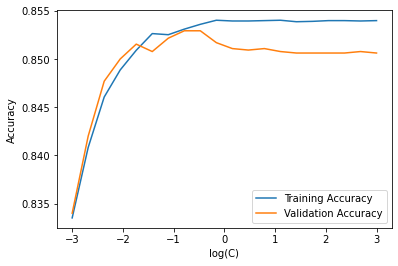

In [10]:
tr_acc = []
va_acc = []
exp_list = np.linspace(-3, 3, 20)

for k in exp_list:
    temp_mod = LogisticRegression(solver='lbfgs', C=10**k, multi_class='ovr', max_iter = 1000)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(exp_list, tr_acc, label='Training Accuracy')
plt.plot(exp_list, va_acc, label='Validation Accuracy')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `k` that results in the largest validation accuracy. Print this result. 

In [11]:
idx = np.argmax(va_acc)
best_logC = exp_list[idx]
print(best_logC)

-0.7894736842105265


Create a logistic regression model using the previously determined value for the regularization parameter. Print the training and validation accuracies for this model, clearly indicating which is which.

In [13]:
mod_1 = LogisticRegression(solver='lbfgs', C=10**best_logC, multi_class='ovr', max_iter = 1000)
mod_1.fit(X_train, y_train)

print('Training Accuracy:  ', mod_1.score(X_train, y_train))
print('Validation Accuracy:', mod_1.score(X_val, y_val))

Training Accuracy:   0.8530789312039312
Validation Accuracy: 0.8529095654844158


## Part D: K-Nearest Neighbors Model

In the cell below, create and fit several KNN models, each with a different value of `K`. In particular, consider 10 models with values of `K` ranging from 1 to 30. For each model, log the validation accuracy (but NOT the training accuracy) in a list, and then plot these lists against `k`. Label your axes, and display a legend for your plot. 

Note: This could take a while to run. It took around 10 minutes on my computer. Grab a coffee.  

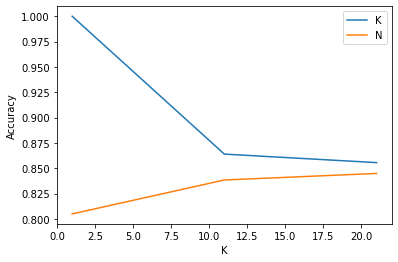

Wall time: 4min 40s


In [15]:
%%time 
tr_acc = []
va_acc = []

k_range = range(1, 30, 10)

for k in k_range:
    knn_model = KNeighborsClassifier(k)
    knn_model.fit(X_train, y_train)

    tr_acc.append(knn_model.score(X_train, y_train))
    va_acc.append(knn_model.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(k_range, tr_acc, label='Training Accuracy')
plt.plot(k_range, va_acc, label='Validation Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend('KNN model, finding best K')
plt.show()

Use `np.argmax` to find the value of `K` that results in the largest validation accuracy. Print this result. 

In [17]:
idx = np.argmax(va_acc)
best_knn = k_range[idx]
print(best_knn)

21


Create a KNN model using the previously determined value of `K`. Print the training and validation accuracies for this model, clearly indicating which is which.

In [19]:
np.random.seed(1)
mod_2 = KNeighborsClassifier(best_knn)
mod_2.fit(X_train, y_train)

print('Training Accuracy:  ', mod_2.score(X_train, y_train))
print('Validation Accuracy:', mod_2.score(X_val, y_val))

Training Accuracy:   0.855612714987715
Validation Accuracy: 0.844925533548288


## Part E: Decision Tree Model

In the cell below, create and fit several decision tree models, each with a different value for the `max_depth` parameter. In particular, consider models for every value of max_dept from 1 to 30. For each model, log the training and validation accuracies in seperate lists, and then plot these lists against the max depth. Label your axes, and display a legend for your plot. 

Set a seed of 1 at the beginning of this cell.

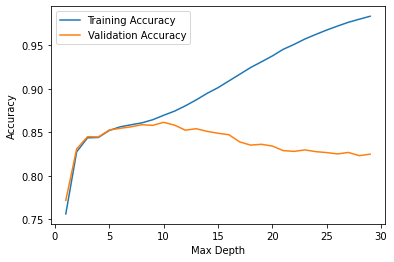

In [20]:
tr_acc = []
va_acc = []
depth_list = range(1,30)

np.random.seed(1)
for d in depth_list:
    np.random.seed(1)
    temp_mod = DecisionTreeClassifier(max_depth=d)
    temp_mod.fit(X_train, y_train)
    tr_acc.append(temp_mod.score(X_train, y_train))
    va_acc.append(temp_mod.score(X_val, y_val))
    
plt.figure(figsize=([6,4]))
plt.plot(depth_list, tr_acc, label='Training Accuracy')
plt.plot(depth_list, va_acc, label='Validation Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use `np.argmax` to find the value of `max_depth` that results in the largest validation accuracy. Print this result. 

In [21]:
idx = np.argmax(va_acc)
best_d = depth_list[idx]
print(best_d)

10


Create a tree model using the previously determined value of `max_depth`. Print the training and validation accuracies for this model, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [22]:
np.random.seed(1)
mod_3 = DecisionTreeClassifier(max_depth=best_d)
mod_3.fit(X_train, y_train)

print('Training Accuracy:  ', mod_3.score(X_train, y_train))
print('Validation Accuracy:', mod_3.score(X_val, y_val))

Training Accuracy:   0.8695485257985258
Validation Accuracy: 0.8615077537233226


## Part F: Voting Classifier

Use `VotingClassifier` to create an ensemble of the three models that you previously created. Fit this ensemble model, and then print the training and validation accuracies, clearly indicating which is which.

Set a seed of 1 at the beginning of this cell.

In [26]:
np.random.seed(1)
voting_clf = VotingClassifier(
    estimators = [('lr', mod_1), ('knn', mod_2), ('tree', mod_3)],
    voting = 'soft')

voting_clf.fit(X_train, y_train)

print('Training Accuracy:  ', voting_clf.score(X_train, y_train))
print('Validation Accuracy:', voting_clf.score(X_val, y_val))

Training Accuracy:   0.8690494471744472
Validation Accuracy: 0.8627360663288807


## Part G: Summary

Print the validation accuracies for each of the four models, clearly indicating which is which. 

In [33]:
print('Validation Accuracy for the Logistic Regression Model: ', mod_1.score(X_val,y_val))
print('Validation Accuracy for the K-Nearest Neighbors Model: ',  mod_2.score(X_val,y_val))
print('Validation Accuracy for the Decision Tree Model: ',  mod_3.score(X_val,y_val))
print('Validation Accuracy for the Voting Classifier: ',  voting_clf.score(X_val,y_val))

Validation Accuracy for the Logistic Regression Model:  0.8529095654844158
Validation Accuracy for the K-Nearest Neighbors Model:  0.844925533548288
Validation Accuracy for the Decision Tree Model:  0.8615077537233226
Validation Accuracy for the Voting Classifier:  0.8627360663288807
